# Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

### Задание 1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки. Визуализируйте несколько изображений из датасета. Произведите нормализацию данных. 


*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [11]:
from tensorflow import keras

(trainX, trainY), (testX, testY) = keras.datasets.cifar10.load_data()
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255


trainY = keras.utils.to_categorical(trainY, 10)
testY = keras.utils.to_categorical(testY, 10)

print('Train: X = ', trainX.shape)
print('Train: Y = ', trainY.shape)
print()
print('Test: X = ', testX.shape)
print('Test: Y = ', testY.shape)

Train: X =  (50000, 32, 32, 3)
Train: Y =  (50000, 10)

Test: X =  (10000, 32, 32, 3)
Test: Y =  (10000, 10)


### Задание 2. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout(). 

Имя данной модели: model_1

In [30]:
from keras.layers import Activation, BatchNormalization, Dropout, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential

model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 15, 15, 64)        18496     
                                                     

Обучите созданную модель

In [31]:
batch_size = 128
epochs = 10

In [32]:
model_1_history = model_1.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/10
391/391 [==============================] - 4s 9ms/step - loss: 1.4585 - accuracy: 0.4724 - val_loss: 1.1246 - val_accuracy: 0.5977
Epoch 2/10
391/391 [==============================] - 3s 7ms/step - loss: 1.0108 - accuracy: 0.6440 - val_loss: 0.9500 - val_accuracy: 0.6693
Epoch 3/10
391/391 [==============================] - 3s 8ms/step - loss: 0.8059 - accuracy: 0.7187 - val_loss: 0.8048 - val_accuracy: 0.7235
Epoch 4/10
391/391 [==============================] - 3s 7ms/step - loss: 0.6605 - accuracy: 0.7703 - val_loss: 0.7625 - val_accuracy: 0.7401
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 0.5367 - accuracy: 0.8118 - val_loss: 0.7610 - val_accuracy: 0.7425
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 0.4204 - accuracy: 0.8531 - val_loss: 0.7755 - val_accuracy: 0.7477
Epoch 7/10
391/391 [==============================] - 3s 7ms/step - loss: 0.3168 - accuracy: 0.8904 - val_loss: 0.8553 - val_accuracy: 0.7515
Epoch 

### Задание 3. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization(). 

Имя данной модели: model_2

In [50]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))

model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))

model_2.add(BatchNormalization())
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_42 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_48 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_43 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_14 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                

Обучите созданную модель

In [51]:
batch_size = 128
epochs = 10

In [52]:
model_2_history = model_2.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/10
391/391 [==============================] - 4s 10ms/step - loss: 1.2635 - accuracy: 0.5641 - val_loss: 2.6715 - val_accuracy: 0.2667
Epoch 2/10
391/391 [==============================] - 6s 16ms/step - loss: 0.8037 - accuracy: 0.7191 - val_loss: 0.9157 - val_accuracy: 0.6903
Epoch 3/10
391/391 [==============================] - 7s 17ms/step - loss: 0.6042 - accuracy: 0.7899 - val_loss: 1.0245 - val_accuracy: 0.6620
Epoch 4/10
391/391 [==============================] - 7s 18ms/step - loss: 0.4561 - accuracy: 0.8421 - val_loss: 1.0946 - val_accuracy: 0.6733
Epoch 5/10
391/391 [==============================] - 7s 18ms/step - loss: 0.3126 - accuracy: 0.8948 - val_loss: 0.9413 - val_accuracy: 0.7238
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 0.1967 - accuracy: 0.9357 - val_loss: 1.0671 - val_accuracy: 0.7138
Epoch 7/10
391/391 [==============================] - 4s 9ms/step - loss: 0.1320 - accuracy: 0.9572 - val_loss: 1.3088 - val_accuracy: 0.6738


### Задание 4. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout(). 

Имя данной модели: model_3

In [43]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(10))
model_3.add(Activation('softmax'))

model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_30 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_31 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 15, 15, 32)        0         
                                                     

Обучите созданную модель

In [44]:
batch_size = 128
epochs = 20

In [45]:
model_3_history = model_3.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/20
391/391 [==============================] - 4s 9ms/step - loss: 1.6267 - accuracy: 0.3990 - val_loss: 1.2620 - val_accuracy: 0.5448
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 1.2154 - accuracy: 0.5671 - val_loss: 1.0527 - val_accuracy: 0.6221
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 1.0483 - accuracy: 0.6312 - val_loss: 0.9257 - val_accuracy: 0.6735
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 0.9327 - accuracy: 0.6712 - val_loss: 0.8877 - val_accuracy: 0.6866
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 0.8531 - accuracy: 0.7020 - val_loss: 0.7851 - val_accuracy: 0.7286
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 0.7899 - accuracy: 0.7211 - val_loss: 0.7713 - val_accuracy: 0.7349
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: 0.7375 - accuracy: 0.7427 - val_loss: 0.7073 - val_accuracy: 0.7553
Epoch 

### Задание 5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [46]:
model_4 = Sequential()
model_4.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_4.add(Activation('relu'))
model_4.add(Conv2D(32, (3, 3)))
model_4.add(Activation('relu'))

model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(64, (3, 3), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())

model_4.add(Dense(512))
model_4.add(Activation('relu'))

model_4.add(Dropout(0.5))
model_4.add(Dense(10))
model_4.add(Activation('softmax'))

model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_36 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_37 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                

Обучите созданную модель

In [47]:
batch_size = 512
epochs = 25

In [48]:
model_4_history = model_4.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/25
98/98 [==============================] - 4s 32ms/step - loss: 1.9343 - accuracy: 0.3718 - val_loss: 3.8312 - val_accuracy: 0.1281
Epoch 2/25
98/98 [==============================] - 3s 32ms/step - loss: 1.3797 - accuracy: 0.5031 - val_loss: 3.3545 - val_accuracy: 0.1386
Epoch 3/25
98/98 [==============================] - 4s 36ms/step - loss: 1.2002 - accuracy: 0.5735 - val_loss: 3.0370 - val_accuracy: 0.2218
Epoch 4/25
98/98 [==============================] - 4s 36ms/step - loss: 1.0601 - accuracy: 0.6229 - val_loss: 2.9666 - val_accuracy: 0.2312
Epoch 5/25
98/98 [==============================] - 4s 38ms/step - loss: 0.9521 - accuracy: 0.6617 - val_loss: 1.4582 - val_accuracy: 0.5117
Epoch 6/25
98/98 [==============================] - 4s 37ms/step - loss: 0.8716 - accuracy: 0.6939 - val_loss: 0.9410 - val_accuracy: 0.6710
Epoch 7/25
98/98 [==============================] - 4s 36ms/step - loss: 0.8001 - accuracy: 0.7169 - val_loss: 0.8034 - val_accuracy: 0.7174
Epoch 8/25
98

### Задание 5. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель

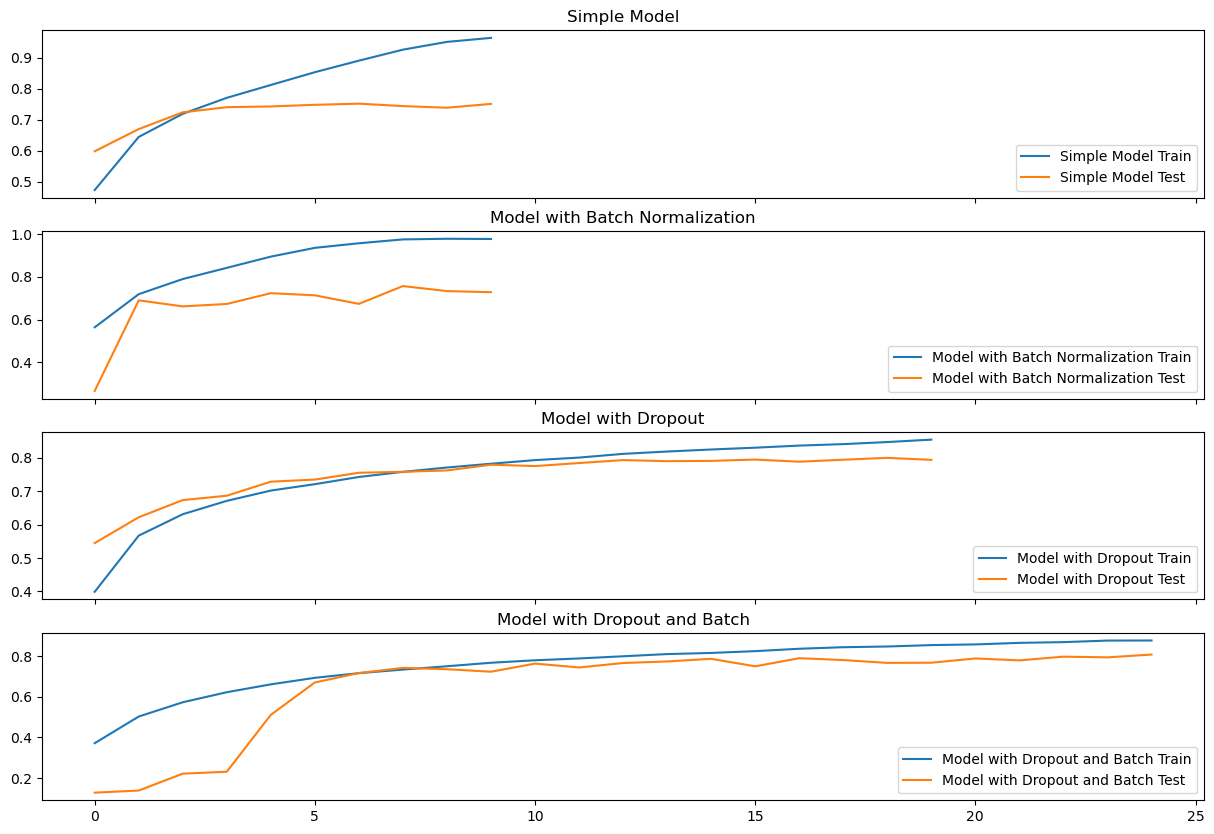

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, (model1Plt, model2Plt, model3Plt, model4Plt) = plt.subplots(4, sharex=True)

fig.set_figwidth(15)
fig.set_figheight(10)

model1Plt.set_title("Simple Model")
model1Plt.plot(model_1_history.history['accuracy'])
model1Plt.plot(model_1_history.history['val_accuracy'])
model1Plt.legend(['Simple Model Train', 'Simple Model Test'], loc="lower right")

model2Plt.set_title("Model with Batch Normalization")
model2Plt.plot(model_2_history.history['accuracy'])
model2Plt.plot(model_2_history.history['val_accuracy'])
model2Plt.legend(['Model with Batch Normalization Train', 'Model with Batch Normalization Test'], loc="lower right")

model3Plt.set_title("Model with Dropout")
model3Plt.plot(model_3_history.history['accuracy'])
model3Plt.plot(model_3_history.history['val_accuracy'])
model3Plt.legend(['Model with Dropout Train', 'Model with Dropout Test'], loc="lower right")

model4Plt.set_title("Model with Dropout and Batch")
model4Plt.plot(model_4_history.history['accuracy'])
model4Plt.plot(model_4_history.history['val_accuracy'])
_ = model4Plt.legend(['Model with Dropout and Batch Train', 'Model with Dropout and Batch Test'], loc="lower right")


#### Ваши выводы

Как видно из модели, из графиков, нормалищация батчами не значительно изменяет обучение и конечную точность модели. Dropout, а также Dropout совмещенный с нормализацией батчами значительно увеличивают эффективность модели, но в то же самое время увеличивают и количество эпох, необходимое для ее обучения

#### Ваш итог

Самую высокую точность показала модели использующая нормализацию батчами и Dropout, обучавшаяся в течение 25 эпох.

Ее точность составила: 80.85%